**Bike demand prediction**

In [ ]:
# import the pakages required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
# step 1 - Read the data
bikes = pd.read_csv('hour.csv')

In [ ]:
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# step 2 - prelim Analysis and Feature selection
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index','date','casual','registered'], axis=1)

In [ ]:
bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [ ]:
# Basic check of missing value
bikes_prep.isnull().sum(axis=0)

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

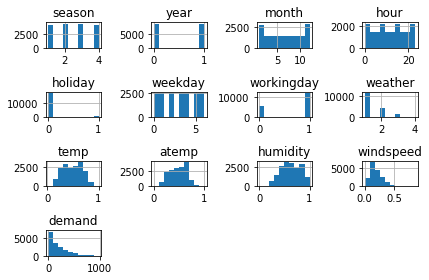

In [ ]:
# visualize the data using pandas histogram
# tight_layout() used to remove overlap
bikes_prep.hist()
plt.tight_layout()

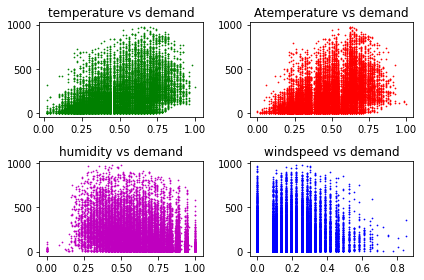

In [ ]:
# step 3 - Data visualization for numerical
plt.subplot(2,2,1)
plt.title('temperature vs demand')
colors = ['g','r','m','b']
plt.scatter(bikes_prep['temp'],bikes_prep['demand'],s=0.5 , c = 'g')


plt.subplot(2,2,2)
plt.title('Atemperature vs demand')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'],s=0.5 , c = 'r')

plt.subplot(2,2,3)
plt.title('humidity vs demand')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'],s=0.5 , c = 'm')

plt.subplot(2,2,4)
plt.title('windspeed vs demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'],s=0.5 , c = 'b')

plt.tight_layout()
plt.show()

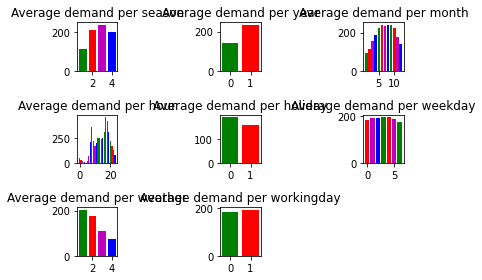

In [ ]:
# data visualization for categorical

# create list of unique season's values
cat_list = bikes_prep['season'].unique()

# create average demond per season using groupby
cat_average = bikes_prep.groupby('season').mean()['demand']

colors = ['g','r','m','b']
plt.subplot(3,3,1)
plt.title('Average demand per season')
plt.bar(cat_list,cat_average,color = colors)


cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.subplot(3,3,2)
plt.title('Average demand per year')
plt.bar(cat_list,cat_average,color = colors)

cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
plt.subplot(3,3,3)
plt.title('Average demand per month')
plt.bar(cat_list,cat_average,color = colors)

cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.subplot(3,3,4)
plt.title('Average demand per hour')
plt.bar(cat_list,cat_average,color = colors)

cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.subplot(3,3,5)
plt.title('Average demand per holiday')
plt.bar(cat_list,cat_average,color = colors)

cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
plt.subplot(3,3,6)
plt.title('Average demand per weekday')
plt.bar(cat_list,cat_average,color = colors)

cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.subplot(3,3,7)
plt.title('Average demand per weather')
plt.bar(cat_list,cat_average,color = colors)

cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.subplot(3,3,8)
plt.title('Average demand per workingday')
plt.bar(cat_list,cat_average,color = colors)

plt.tight_layout()
plt.savefig('catgorial.png')
plt.show()


In [ ]:
# check outliers
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [ ]:
bikes_prep['demand'].quantile([0.05,0.1,0.12,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.12     11.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [ ]:
# step 4 - check multiple Linear Regression Assumption

# Linearity using correliation coefficient matrix using corr
correlation = bikes_prep[['demand','temp','atemp','humidity','windspeed']].corr()

In [ ]:
correlation

,demand,temp,atemp,humidity,windspeed
demand,1.000000,0.404772,0.400929,-0.322911,0.093234
temp,0.404772,1.000000,0.987672,-0.069881,-0.023125
atemp,0.400929,0.987672,1.000000,-0.051918,-0.062336
humidity,-0.322911,-0.069881,-0.051918,1.000000,-0.290105
windspeed,0.093234,-0.023125,-0.062336,-0.290105,1.000000


In [ ]:
bikes_prep = bikes_prep.drop(['weekday','year','workingday','atemp','windspeed'],axis=1)

In [ ]:
bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474795, 0.47049642, 0.49622893, 0.49404147, 0.46796018,
        0.47732133, 0.5267586 , 0.59145856, 0.65201694, 0.7151968 ,
        0.8059117 , 0.9253113 , 1.        , 0.9253113 , 0.8059117 ,
        0.7151968 , 0.65201694, 0.59145856, 0.5267586 , 0.47732133,
        0.46796018, 0.49404147, 0.49622893, 0.47049642, 0.45474795],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7feb35539520>)

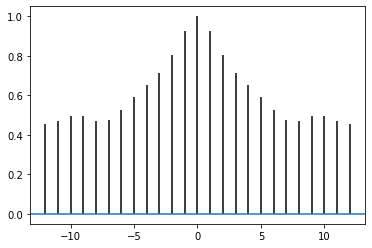

In [ ]:
# check the autocorrelation in demand using acorr
df1 = pd.to_numeric(bikes_prep['demand'],downcast='float')

plt.acorr(df1,maxlags = 12)

In [ ]:
# step 6 - create/Modify new features
# Log normalise the feature 'demand'
df1 = bikes_prep['demand']
df2 = np.log(df1)

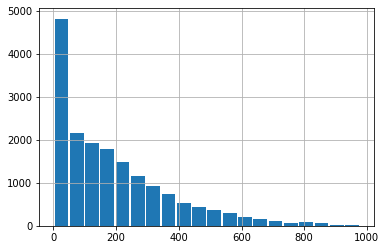

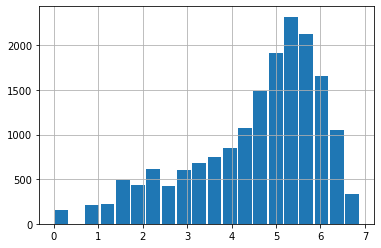

In [ ]:
plt.figure()
df1.hist(rwidth=0.9,bins=20)

plt.figure()
df2.hist(rwidth=0.9,bins=20)

In [ ]:
bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [ ]:
bikes_prep

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,2.772589
1,1,1,1,0,1,0.22,0.80,3.688879
2,1,1,2,0,1,0.22,0.80,3.465736
3,1,1,3,0,1,0.24,0.75,2.564949
4,1,1,4,0,1,0.24,0.75,0.000000
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123
17375,1,12,20,0,2,0.26,0.60,4.488636
17376,1,12,21,0,1,0.26,0.60,4.499810
17377,1,12,22,0,1,0.26,0.56,4.110874


In [ ]:
# autocorrelation in the demand column
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep,t_1,t_2,t_3],axis=1)

In [ ]:
bikes_prep_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879


In [ ]:
bikes_prep_lag = bikes_prep_lag.dropna()

In [ ]:
bikes_prep_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [ ]:
# step 7 - create Dummy Variables and drop first, to avoid dummy variables trap using get_dummies
# season,holiday,weather,month,hour



In [ ]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')



In [ ]:
bikes_prep_lag.dtypes

season      category
month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
t-1          float64
t-2          float64
t-3          float64
dtype: object

In [ ]:
bikes_prep_lag = pd.get_dummies(bikes_prep_lag,drop_first =True)

In [ ]:
bikes_prep_lag.shape

(17376, 47)

In [ ]:
# step 8 - create Train and test split
# split the X and Y dataset into training and testing set


In [ ]:
# demand is the time dependent or time series
y = bikes_prep_lag[['demand']]
x = bikes_prep_lag.drop(['demand'],axis=1)

In [ ]:
# create the size for 70% of the data
tr_size = 0.7 * len(x)
tr_size = int(tr_size)

In [ ]:
x_train = x.values[0:tr_size]
x_test = x.values[tr_size: len(x)]
y_train = y.values[0:tr_size]
y_test = y.values[tr_size: len(y)]

In [ ]:
# prediction using multi linar regression
# step 9 - Fit and score the model
# Linear Regression
from sklearn.linear_model import LinearRegression
std_reg = LinearRegression()
std_reg.fit(x_train,y_train)


LinearRegression()

In [ ]:
# predict the y_values
y_predict = std_reg.predict(x_test)

In [ ]:
r2_train = std_reg.score(x_train,y_train)
r2_test = std_reg.score(x_test,y_test)


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test,y_predict))
rmse

0.38098800498170443

In [ ]:
from sklearn.metrics import mean_absolute_error
rmse = math.sqrt(mean_absolute_error(y_test,y_predict))
rmse

0.5319913881345089

In [ ]:
# Final step - calculate RMSLE and compare rmse
y_test_e = []
y_predict_e =[]

for i in range(0,len(y_test)):
  y_test_e.append(math.exp(y_test[i]))
  y_predict_e.append(math.exp(y_predict[i]))

# Do the sum of the
log_sq_sum = 0.0
for i in range(0,len(y_test_e)):
  log_a = math.log(y_test_e[i] + 1)
  log_p = math.log(y_predict_e[i] + 1)
  log_diff = (log_p - log_a )**2
  log_sq_sum = log_sq_sum + log_diff
rmsle = math.sqrt(log_sq_sum/len(y_test))

print("")
print(rmsle)



0.3560941706980211


In [ ]:
x = pd.DataFrame(y_predict)
print(x)
# x.to_csv('y_predict')

             0
0     3.210018
1     2.865005
2     3.218456
3     3.114121
4     4.197920
...        ...
5208  4.338389
5209  4.419398
5210  4.282179
5211  4.204774
5212  3.649814

[5213 rows x 1 columns]
